# Servicios Web y APIs 

## Índice
1. [API Air Quality](#air)
2. [API de OpenWeather](#wea)

En este Notebook vamos a llamar a diversas APIs. Antes de comenzar, es importante destacar dos conceptos:  

1) **Codificación de URLs**: Toda cadena de cadena de caracteres que se introduzca en una URL tiene que codificarse adecuadamente. En Python, podemos utilizar la función `quote()` del paquete `urllib.parse`

In [3]:
import urllib.parse
urllib.parse.quote('La Coruña      Paula')

'La%20Coru%C3%B1a%20%20%20%20%20%20Paula'

2) **Peticiones HTTP**: la librería `requests` es la más utilizada para realizar peticiones HTTP en Python, permitiendo utilizar los métodos más comunes de este protocolo (GET, POST, PUT, etc.). Para más información entra en este [enlace](https://realpython.com/python-requests/)

También podemos utilizar la librería `urllib.request`

<a id="air"></a>
## API Air Quality

Esta API abierta proporciona información acerca de la calidad del aire en diversas ciudades. La documentación se encuentra en https://docs.openaq.org  

En primer lugar vamos a llamar a la API **cities**, la cual nos informa de las ciudades disponibles

In [43]:
import urllib.request
import json

url1 = 'https://api.openaq.org/v2/cities'
#pais = input('Introduzca las siglas del pais')
url2 = url1 + '?country=' + pais

datos = urllib.request.urlopen(url1).read().decode()

js = json.loads(datos)


for item in js['results'] :
      if item['country']=='ES':
            city = item['city']
            print(city)

A Coruña
Agullana
Alcanar
Alicante/Alacant
Almería
Amposta
Araba/Álava


Esto mismo podemos realizarlo con la librería `requests`

A continuación, llamamos a la API **latest**, que devuelve los últimos registros de una ciudad o país en concreto

In [47]:
#ciudad = input('ciudad')
ciudad = 'Madrid'
url = 'https://api.openaq.org/v2/latest'
url2 = url + '?limit=1&city' + ciudad

datos = urllib.request.urlopen(url2).read().decode()
print(datos)

{"meta":{"name":"openaq-api","license":"","website":"/","page":1,"limit":1,"found":46141},"results":[{"location":"LA BOCA","city":"Buenos Aires","country":"AR","coordinates":{"latitude":-34.62527,"longitude":-58.365550000000006},"measurements":[{"parameter":"pm10","value":18.0,"lastUpdated":"2023-09-11T03:00:00+00:00","unit":"µg/m³"},{"parameter":"co","value":0.0,"lastUpdated":"2023-09-11T03:00:00+00:00","unit":"ppm"},{"parameter":"no2","value":0.046,"lastUpdated":"2023-09-11T03:00:00+00:00","unit":"ppm"}]}]}


Parseamos el JSON de respuesta para obtener todos los niveles disponibles y la fecha de las mediciones

In [51]:
js = json.loads(datos)

for item in js['results'][0]['measurements']:
    parametro = item['parameter']
    valor = item['value']
    unidades = item['unit']
    fecha = item['lastUpdated']

    print('El valor de', parametro,'en',ciudad,' es de', valor,unidades, 'Registrado el', fecha)

El valor de pm10 en Madrid  es de 18.0 µg/m³ Registrado el 2023-09-11T03:00:00+00:00
El valor de co en Madrid  es de 0.0 ppm Registrado el 2023-09-11T03:00:00+00:00
El valor de no2 en Madrid  es de 0.046 ppm Registrado el 2023-09-11T03:00:00+00:00


<a id="wea"></a>
## API de OpenWeather

Esta API permite obtener información climática. Puedes encontrar la documentación en https://openweathermap.org/api.   
Para obtener la API key hay que registrar un email válido, al cual será enviada la clave.  

Vamos a obtener la predicción de velocidad del viento para una ciudad a través de [esta API](https://openweathermap.org/forecast5)

In [57]:

import urllib.request
import json

api_key = '3886d5996f84c5b9a5c953b027fc2306'
latitud = str(47.6)
longitud=  str(45.3)

url = 'https://api.openweathermap.org/data/2.5/forecast?lat=' + latitud + '&lon=' +longitud+'&appid='+api_key
url

'https://api.openweathermap.org/data/2.5/forecast?lat=47.6&lon=45.3&appid=3886d5996f84c5b9a5c953b027fc2306'

In [71]:
data = urllib.request.urlopen(url).read().decode()
data

js = json.loads(data)
lista_fechas = []
lista_vientos = []

for item in js['list']:
    lista_vientos.append(item['wind']['speed'])
    lista_fechas.append(item['dt_txt'])

40

In [99]:
lista_fechas[:2]

['2023-09-10 15:00:00', '2023-09-10 18:00:00']

In [108]:
list_fechas_red = []
lista_num_pares = []
for n in range(20):
    lista_num_pares.append(2*n)

for i in lista_num_pares:
    list_fechas_red.append(lista_fechas[i])
list_fechas_red,lista_num_pares

(['2023-09-10 15:00:00',
  '2023-09-10 21:00:00',
  '2023-09-11 03:00:00',
  '2023-09-11 09:00:00',
  '2023-09-11 15:00:00',
  '2023-09-11 21:00:00',
  '2023-09-12 03:00:00',
  '2023-09-12 09:00:00',
  '2023-09-12 15:00:00',
  '2023-09-12 21:00:00',
  '2023-09-13 03:00:00',
  '2023-09-13 09:00:00',
  '2023-09-13 15:00:00',
  '2023-09-13 21:00:00',
  '2023-09-14 03:00:00',
  '2023-09-14 09:00:00',
  '2023-09-14 15:00:00',
  '2023-09-14 21:00:00',
  '2023-09-15 03:00:00',
  '2023-09-15 09:00:00'],
 [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38])

In [2]:
import matplotlib as plt

ModuleNotFoundError: No module named 'matplotlib'

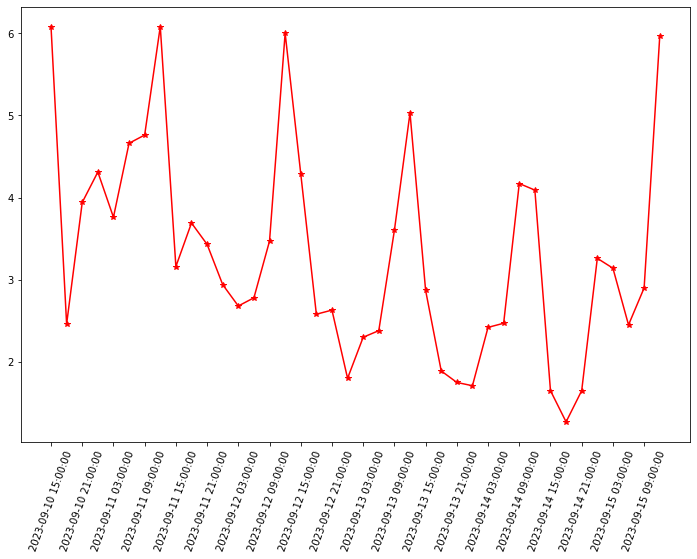

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))   
plt.plot(lista_fechas,lista_vientos, '*r-')
plt.xticks(rotation=70, ticks = list_fechas_red , labels = list_fechas_red )

plt.show()